# K- Means Clustering Vs K-Medoids Clustering

In [1]:
# pip install scikit-learn-extra

In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D
import time

In [23]:
# Load the data
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


## Exploratory Data Analysis

In [24]:
# informations about the data explored
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [25]:
# decribe the data 
data.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [31]:
# printing the number of null values in each column
data.isnull().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

<Axes: >

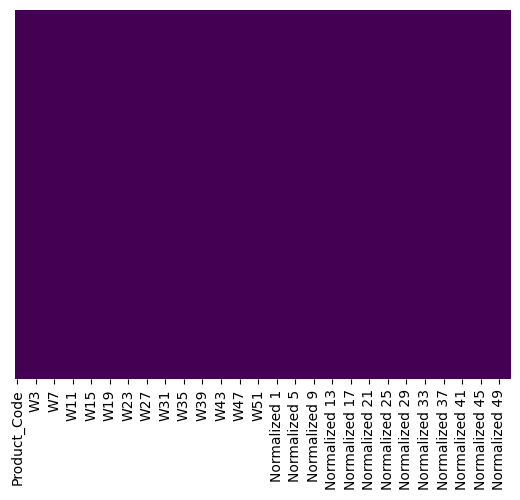

In [27]:
# checking whether presence of any null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
# Checking the data types
print(data.dtypes)

Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object


In [29]:
# checking the shape of the data
data.shape

(811, 107)

<Axes: >

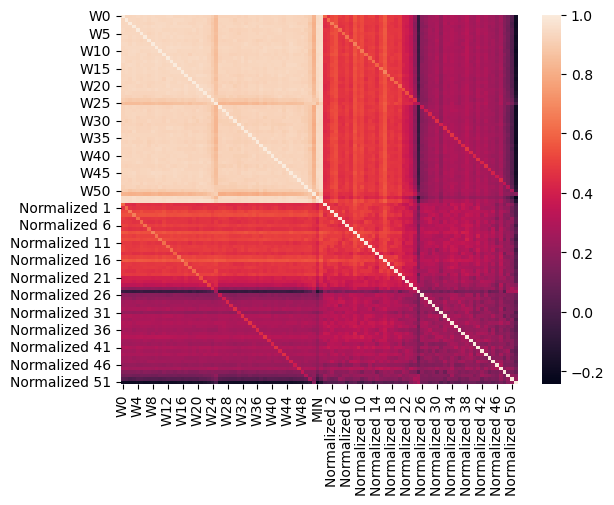

In [30]:
# Correlation Matrix Heatmap
sns.heatmap(data.iloc[:,1:].corr())

In [32]:
# correlation values
data.iloc[:,1:].corr()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
W0,1.000000,0.928234,0.927777,0.932767,0.941081,0.934089,0.937892,0.932157,0.939375,0.935207,...,0.257598,0.281876,0.252050,0.248576,0.217508,0.250772,0.168929,0.116269,0.037429,-0.194346
W1,0.928234,1.000000,0.935928,0.932626,0.929931,0.935433,0.937663,0.931325,0.939928,0.939382,...,0.261424,0.273380,0.249674,0.253492,0.218771,0.262915,0.174286,0.126263,0.033140,-0.194861
W2,0.927777,0.935928,1.000000,0.936166,0.929344,0.936200,0.928048,0.925576,0.929406,0.939855,...,0.261840,0.280806,0.252693,0.262598,0.220089,0.251521,0.173687,0.126890,0.005232,-0.201581
W3,0.932767,0.932626,0.936166,1.000000,0.932885,0.935660,0.939276,0.935071,0.942684,0.939762,...,0.255190,0.276391,0.235575,0.252990,0.218534,0.254131,0.172643,0.116963,0.015644,-0.203561
W4,0.941081,0.929931,0.929344,0.932885,1.000000,0.932268,0.932126,0.927831,0.934932,0.938131,...,0.280807,0.281308,0.247206,0.245176,0.211816,0.260400,0.179474,0.111329,0.042052,-0.193366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normalized 47,0.250772,0.262915,0.251521,0.254131,0.260400,0.259131,0.264028,0.262191,0.256486,0.272633,...,0.192868,0.266684,0.200581,0.265382,0.295919,1.000000,0.190562,0.250722,0.227610,0.140305
Normalized 48,0.168929,0.174286,0.173687,0.172643,0.179474,0.167835,0.186655,0.179400,0.170898,0.174344,...,0.229237,0.179242,0.112218,0.155226,0.140710,0.190562,1.000000,0.145399,0.140540,0.086974
Normalized 49,0.116269,0.126263,0.126890,0.116963,0.111329,0.128601,0.124934,0.122743,0.120234,0.113088,...,0.260964,0.223587,0.215256,0.181920,0.159476,0.250722,0.145399,1.000000,0.222575,0.189519
Normalized 50,0.037429,0.033140,0.005232,0.015644,0.042052,0.038528,0.030253,0.024310,0.029663,0.031354,...,0.104870,0.161993,0.133835,0.153766,0.138545,0.227610,0.140540,0.222575,1.000000,0.221114


## Data Preprocessing

In [4]:
# Separate the data into features (X) and normalization features (X_norm)
X = data.iloc[:, 1:52]  # Assuming the columns from W0 to Normalized 51 are features
X_norm = data.iloc[:, 52:]  # Assuming the columns from Normalized 0 to Normalized 51 are normalization features

<Axes: >

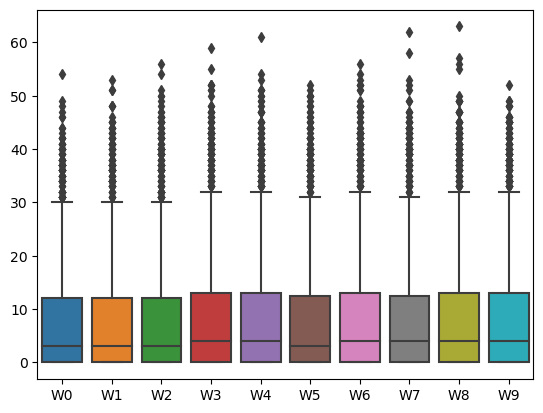

In [5]:
# Outlier Detection
sns.boxplot(data=X.iloc[:,:10])

In [6]:
# Create empty lists to store the upper bounds for each week
upper_bounds = []
lower_bounds = [] 
# Iterate over each week column
for week in range(52):
    # Compute the quartiles for the current week
    Q1 = data[f'W{week}'].quantile(0.25)
    Q3 = data[f'W{week}'].quantile(0.75)
    
    # Compute the IQR and upper bound for the current week
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Append the upper bound to the list
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    data_new=data.loc[(data[f'W{week}']>upper_bound) | (data[f'W{week}'] < lower_bound)]

<Axes: >

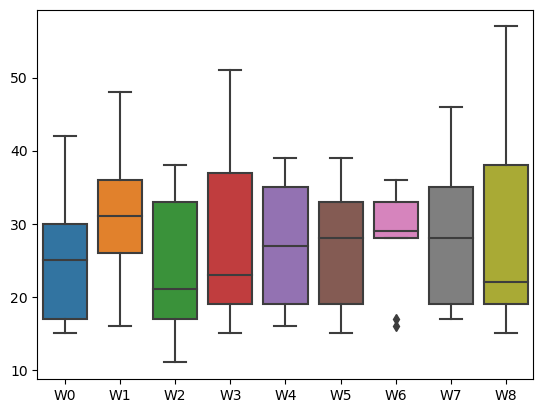

In [7]:
sns.boxplot(data=data_new.iloc[:,:10])

In [8]:
# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

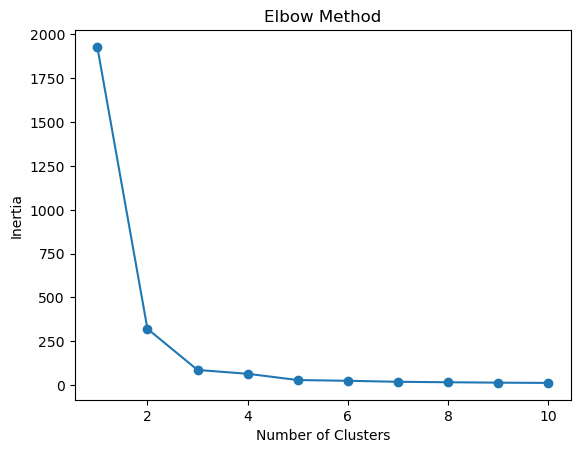

In [10]:
# # Choose the number of clusters (K)
# Calculate the inertia for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## K- Means Clustering

In [11]:
# Start time
start_time = time.time()

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# End time
end_time = time.time()
# time of execution
elapsed_time = end_time - start_time

print("KMeans clustering time:", elapsed_time, "seconds")

# kmeans labels
kmeans_labels = kmeans.labels_

KMeans clustering time: 0.023259878158569336 seconds


In [13]:
# Add K-means cluster labels to the original data
data['KMeans_Cluster'] = kmeans_labels
# Extract centroids from K-means model
kmeans_centroids = kmeans.cluster_centers_

## K-Medoids Clustering

In [14]:
# Start time
start_time = time.time()

# K-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_pca)

# End time
end_time = time.time()

# Compute the elapsed time
elapsed_time = end_time - start_time
print("KMedoids clustering time:", elapsed_time, "seconds")

# kmedoids labels
kmedoids_labels = kmedoids.labels_

KMedoids clustering time: 0.03637218475341797 seconds


In [16]:
# Add K-medoids cluster labels to the original data
data['KMedoids_Cluster'] = kmedoids_labels
# Extract centroids from K-medoids model
# Since K-medoids uses actual data points as centroids, we'll find the data points closest to the medoids
kmedoids_medoids_indices = kmedoids.medoid_indices_
kmedoids_centroids = X_pca[kmedoids_medoids_indices]

### Plotting the Results

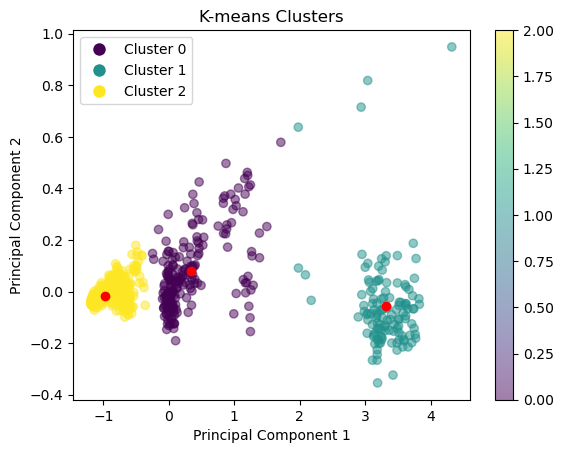

In [17]:
# Plot K-means clusters
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='o', label='Centroids')
plt.title('K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)

# Extract colors used in the scatter plot
colors = [scatter.cmap(scatter.norm(cluster_label)) for cluster_label in range(3)]

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_label}', 
                          markerfacecolor=colors[cluster_label], markersize=10) for cluster_label in range(3)]

# Add legend with custom handler
plt.legend(handles=legend_elements, loc='upper left')
plt.show()

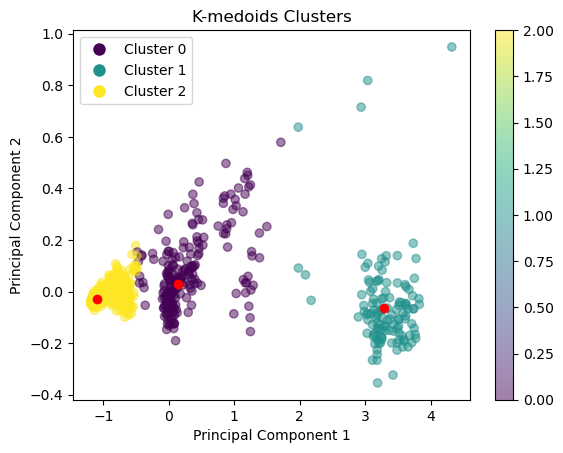

In [18]:
# Plot K-medoids clusters
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmedoids_centroids[:, 0], kmedoids_centroids[:, 1], c='red', label='Centroids')
plt.title('K-medoids Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)

# Extract colors used in the scatter plot
colors = [scatter.cmap(scatter.norm(cluster_label)) for cluster_label in range(3)]

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_label}', 
                          markerfacecolor=colors[cluster_label], markersize=10) for cluster_label in range(3)]

# Add legend with custom handler
plt.legend(handles=legend_elements, loc='upper left')
plt.show()

### Analysis of results and comparison

In [19]:
# Evaluate Silhouette Score
silhouette_score_kmeans = metrics.silhouette_score(X_pca, kmeans_labels)
silhouette_score_kmedoids = metrics.silhouette_score(X_pca, kmedoids_labels)

# Evaluate Davies–Bouldin Index
davies_bouldin_index_kmeans = metrics.davies_bouldin_score(X_pca, kmeans_labels)
davies_bouldin_index_kmedoids = metrics.davies_bouldin_score(X_pca, kmedoids_labels)

print("Silhouette Score:")
print(f"K-means: {silhouette_score_kmeans}")
print(f"K-medoids: {silhouette_score_kmedoids}")
print("\nDavies–Bouldin Index:")
print(f"K-means: {davies_bouldin_index_kmeans}")
print(f"K-medoids: {davies_bouldin_index_kmedoids}")

Silhouette Score:
K-means: 0.7529008583631565
K-medoids: 0.7458275796208751

Davies–Bouldin Index:
K-means: 0.3756300324151664
K-medoids: 0.37968151042841697


In [20]:
# Count the number of data points in each cluster
unique, counts = np.unique(kmeans_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of data points in each cluster (KMeans):", cluster_counts)

Number of data points in each cluster (KMeans): {0: 197, 1: 124, 2: 490}


In [21]:
# Count the number of data points in each cluster
unique, counts = np.unique(kmedoids_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of data points in each cluster (KMedoids):", cluster_counts)

Number of data points in each cluster (KMedoids): {0: 206, 1: 124, 2: 481}
